In [1]:
pip install requests pillow duckduckgo-search


  Obtaining dependency information for duckduckgo-search from https://files.pythonhosted.org/packages/75/21/fc2c821a2c92c021f8f8adf9fb36235d1b49525b7cd953e85624296aab94/duckduckgo_search-7.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1.8 from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/click-8.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for primp>=0.14.0 from https://files.pythonhosted.org/packages/77/65/3cd25b4f4d0cd9de4f1d95858dcddd7ed082587524294c179c847de18951/primp-0.14.0-cp38-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for lxml>=5.3.0 from https://files.pythonhosted.org/packages/57/bb/2faea15df82114fa27f2a86eec220506c532ee8ce211dff22f48881b353a/lxml-5.3.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2

## Downloading 50 images each of 20 categories

In [2]:
import os
import csv
import requests
from PIL import Image
from io import BytesIO
from duckduckgo_search import DDGS  


download_path = os.path.expanduser("~/Downloads/images_dataset")  
os.makedirs(download_path, exist_ok=True)

categories = ["sunset", "mountains", "dog", "cat", "car", "chess board", "bicycle", "airplane", "skyscraper", "food",
             "table", "shirt", "tie", "zoo", "computer", "chair", "headphones", "shoe", "watch", "book"]

csv_file = os.path.join(download_path, "image_metadata.csv")

with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Category", "Image_Name", "Image_URL", "Resolution"])

    with DDGS() as ddgs:
        for category in categories:
            category_path = os.path.join(download_path, category)
            os.makedirs(category_path, exist_ok=True)

            downloaded = 0
            seen_urls = set()

            while downloaded < 50:
                results = list(ddgs.images(category, max_results=60))  

                for image in results:
                    if downloaded >= 50:
                        break  

                    url = image.get("image")
                    if not url or url in seen_urls:
                        continue  

                    try:
                        response = requests.get(url, timeout=10)
                        img = Image.open(BytesIO(response.content))
                        img = img.convert("RGB")

                        img_name = f"{category}_{downloaded}.jpg"
                        img_path = os.path.join(category_path, img_name)
                        img.save(img_path, "JPEG")

                        writer.writerow([category, img_name, url, img.size])
                        seen_urls.add(url)
                        downloaded += 1

                        print(f"Downloaded ({downloaded}/50) {img_name} from {url}")

                    except Exception as e:
                        print(f"Skipping {category}_{downloaded}: {e}")

print(f"Images saved in: {download_path}")


Downloaded (1/50) sunset_0.jpg from https://wallpaperaccess.com/full/338765.jpg
Downloaded (2/50) sunset_1.jpg from https://images.pexels.com/photos/269583/pexels-photo-269583.jpeg?cs=srgb&dl=art-beach-beautiful-269583.jpg&fm=jpg
Downloaded (3/50) sunset_2.jpg from https://wallpaperaccess.com/full/2674365.jpg
Downloaded (4/50) sunset_3.jpg from https://wallpaperaccess.com/full/338785.jpg
Downloaded (5/50) sunset_4.jpg from https://images.hdqwalls.com/wallpapers/blue-hour-sunset-beach-4k-ct.jpg
Downloaded (6/50) sunset_5.jpg from https://images.pexels.com/photos/417211/pexels-photo-417211.jpeg?cs=srgb&dl=beach-clouds-coast-417211.jpg&fm=jpg
Downloaded (7/50) sunset_6.jpg from https://wallpapercave.com/wp/wp5582517.jpg
Downloaded (8/50) sunset_7.jpg from https://hdqwalls.com/wallpapers/sea-sunset-beach-sunlight-long-exposure-4k-ku.jpg
Downloaded (9/50) sunset_8.jpg from https://wallpapercave.com/wp/3klnmq2.jpg
Downloaded (10/50) sunset_9.jpg from https://cdn.suwalls.com/wallpapers/beache

/Users/user/anaconda3/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Downloaded (16/50) chess board_15.jpg from http://www.stickpng.com/assets/images/580b585b2edbce24c47b27aa.png
Downloaded (17/50) chess board_16.jpg from https://goodstock.photos/wp-content/uploads/close-up-chess-board.jpg
Downloaded (18/50) chess board_17.jpg from https://i.etsystatic.com/14548839/r/il/e6a2f4/2801508317/il_fullxfull.2801508317_2gxd.jpg
Downloaded (19/50) chess board_18.jpg from https://i.etsystatic.com/26558709/r/il/7421a3/3005908568/il_fullxfull.3005908568_slng.jpg
Skipping chess board_19: HTTPSConnectionPool(host='chessentials.com', port=443): Max retries exceeded with url: /storage/2018/09/Egyptican-Chess-set.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1002)')))
Downloaded (20/50) chess board_19.jpg from https://images.chesscomfiles.com/uploads/v1/images_users/tiny_mce/NiiLoC/phpR0QV1A.jpeg
Downloaded (21/50) chess board_20.jpg from https://i.pin

In [3]:
pip install torch torchvision matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

dataset_path = os.path.join(current_dir, "images_dataset")
print(f"Dataset Path: {dataset_path}")


Current Directory: /Users/user
Dataset Path: /Users/user/images_dataset


## I will be finetuning ResNet18 on this dataset to use it for classification

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_path = "/Users/user/Downloads/images_dataset"

train_data = datasets.ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

class_names = train_data.classes
print(f"Classes: {class_names}")


Classes: ['airplane', 'bicycle', 'book', 'car', 'cat', 'chair', 'chess board', 'computer', 'dog', 'food', 'headphones', 'mountains', 'shirt', 'shoe', 'skyscraper', 'sunset', 'table', 'tie', 'watch', 'zoo']


In [11]:
train_data

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /Users/user/Downloads/images_dataset
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [12]:
import torch.nn as nn
import torchvision.models as models

model = models.resnet18(pretrained=True)

# Modify the final layer for custom categories
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/Users/user/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/user/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
import torch.optim as optim
from tqdm import tqdm

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with tqdm
epochs = 3
for epoch in range(epochs):
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=running_loss / (progress_bar.n + 1))

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/5: 100%|█████████████████████| 32/32 [01:32<00:00,  2.88s/it, loss=1.11]


Epoch 1/5, Loss: 1.1052454644814134


Epoch 2/5: 100%|████████████████████| 32/32 [01:29<00:00,  2.81s/it, loss=0.467]


Epoch 2/5, Loss: 0.46650860365480185


Epoch 3/5: 100%|████████████████████| 32/32 [01:30<00:00,  2.82s/it, loss=0.266]


Epoch 3/5, Loss: 0.26643325947225094


Epoch 4/5: 100%|████████████████████| 32/32 [01:29<00:00,  2.79s/it, loss=0.289]


Epoch 4/5, Loss: 0.2892168762627989


Epoch 5/5: 100%|████████████████████| 32/32 [01:30<00:00,  2.82s/it, loss=0.272]

Epoch 5/5, Loss: 0.27226941275876015


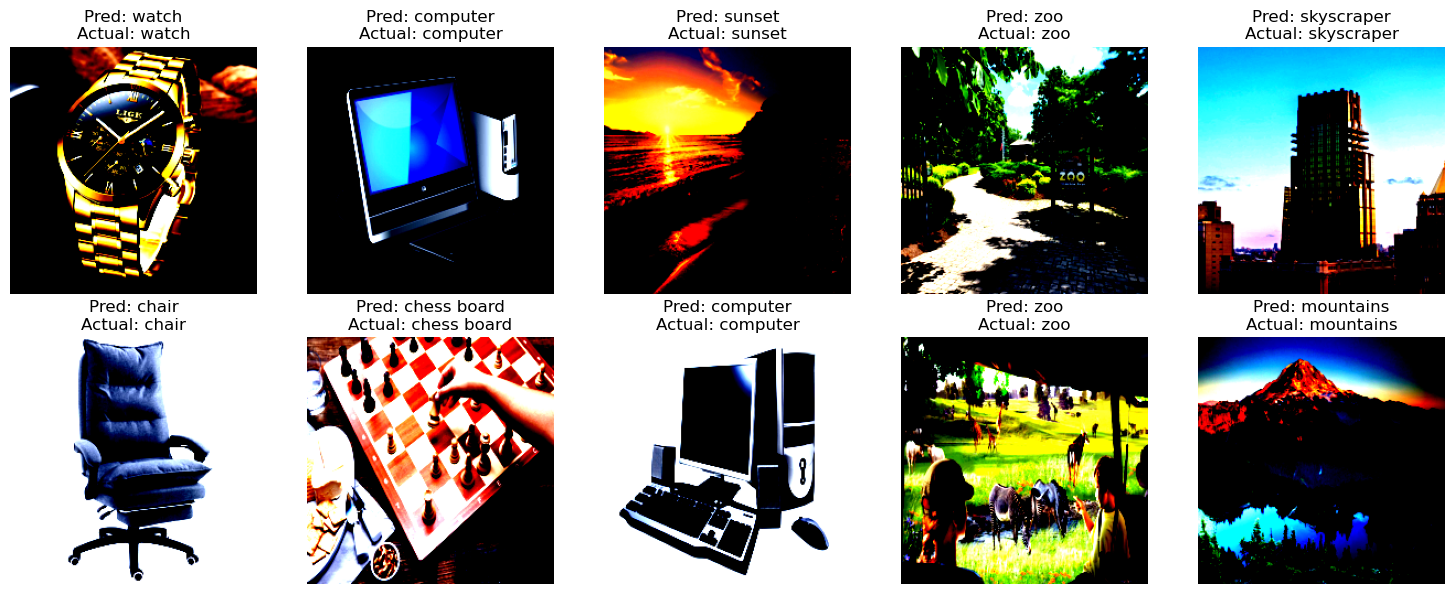

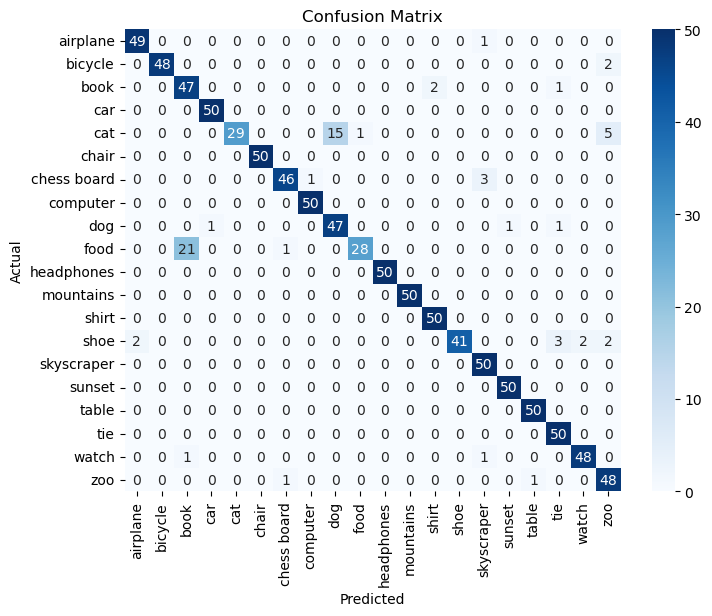

In [16]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from sklearn.metrics import confusion_matrix

# Function to predict & visualize
def visualize_predictions_and_confusion_matrix(model, dataset, loader, num_images=10):
    model.eval()
    
    images, labels = next(iter(loader))
    images, labels = images[:num_images].to(device), labels[:num_images].to(device)

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  
    axes = axes.flatten()
    
    for i in range(num_images):
        img = images[i].cpu().numpy().transpose(1, 2, 0)
        img = np.clip(img, 0, 1)  
        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {class_names[preds[i]]}\nActual: {class_names[labels[i]]}")
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

    all_preds, all_labels = [], []
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Show predictions & confusion matrix
visualize_predictions_and_confusion_matrix(model, train_data, train_loader)
